In [1]:
from agents.matchmanager import MatchManager,buildMatchManager
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
from agents.ml.regressor import RegressorAgent
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import logging
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dfs=[]
for i in range(3):
    board, state = scenarioJunction()
    playerRed = RegressorAgent(RED, {'scenario': board.name, 'model': 'RandomForestRegressor','color':'red'})
    playerBlue = RegressorAgent(BLUE, {'scenario': board.name, 'model': 'RandomForestRegressor','color':'blue'})
    mm = MatchManager(' ', playerRed, playerBlue, board, state, seed=50+i)
    while not mm.end:
        mm.nextStep()
    df_blue=playerBlue.createDf(i)
    df_red=playerRed.createDf(i)
    win_blue = [mm.winner] * len(df_blue)
    win_red = [mm.winner] * len(df_red)
    df_blue['winner']=win_blue
    df_red['winner']=win_red
    dfs.append(df_blue)
    dfs.append(df_red)
df=pd.concat(dfs)
    

In [12]:
for i in df[df['Numero Partita']==2]['Mossa']:
    print(i)

BLUE : Pass in response
BLUE : bAPC1     : Moved to (35, 39)
BLUE : bAPC1     : Moved to (35, 39)
BLUE : bInf1     : Moved to (39, 34)
BLUE : bInf1     : Moved to (39, 34)
BLUE : bInf2     : Moved to (29, 25)
BLUE : bInf2     : Moved to (29, 25)
BLUE : Pass in response
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bInf1      Pass
BLUE : bInf1      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : Pass in response
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bInf1      Pass
BLUE : bInf1      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : Pass in response
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bInf1      Pass
BLUE : bInf1      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : Pass in response
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bInf1      Pass
BLUE : bInf1      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : Pass in response
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bInf1      Pass
BLUE : bInf1 

In [10]:
for i in df[df['Numero Partita']==1]['Mossa']:
    print(i)

BLUE : bInf1     : Attack rTank3 with Anti-tank weapon in response
BLUE : bAPC1     : Moved to (27, 19)
BLUE : bAPC1     : Moved to (27, 19)
BLUE : Pass in response
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : Pass in response
BLUE : bInf2     : Moved to (35, 23)
BLUE : bInf2     : Moved to (35, 23)
BLUE : Pass in response
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : bInf2     : Attack rTank3 with Anti-tank weapon in response
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BLUE : bInf2      Pass
BLUE : bInf2      Pass
BLUE : bAPC1      Pass
BLUE : bAPC1      Pass
BL

In [4]:
df_i=df.reset_index()

In [ ]:
pd.pivot_table(df.reset_index(),
               index='index', columns=['Agente','Numero Partita'], values='Score'
              ).plot(subplots=True)

In [5]:
def plotgroupAgentePartita(df,value_y,kind):
    fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
    for (joinGroup, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
        win=group['winner'].unique()
        title=f'{joinGroup}-> winner:{win}'
        group.plot(x='Count', y=value_y, kind=kind,style='-o' ,ax=ax,title=title,ylim=[-1,1])

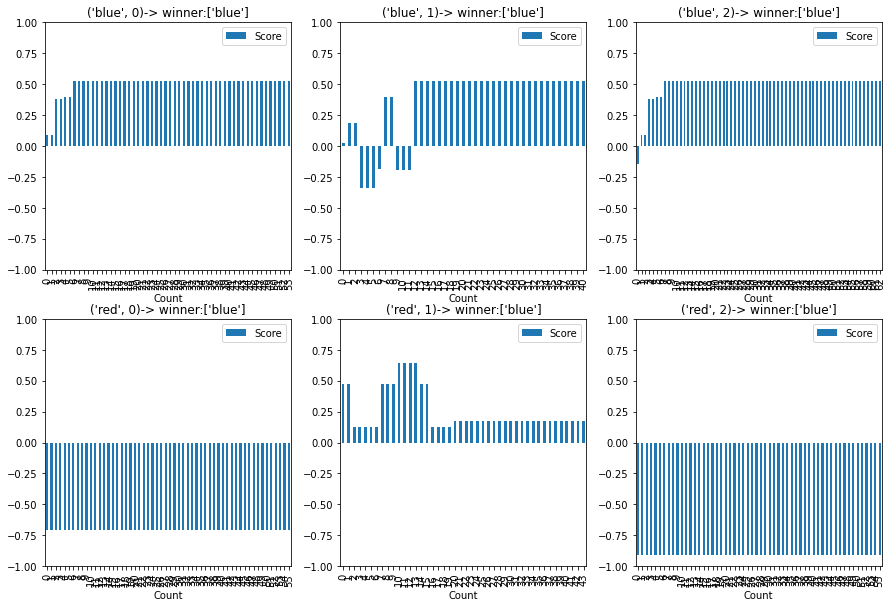

In [6]:
plotgroupAgentePartita(df,'Score','bar')

In [ ]:
plotgroupAgentePartita(df,'Entropia','bar')

In [ ]:
plotgroupAgentePartita(df,'Score','scatter')

In [ ]:
plotgroupAgentePartita(df,'Entropia','scatter')

In [ ]:
plotgroupAgentePartita(df,'Score','line')

In [ ]:
plotgroupAgentePartita(df,'Entropia','line')

In [ ]:
plotgroupAgentePartita(df,'Score','box')

In [ ]:
plotgroupAgentePartita(df,'Entropia','box')

In [ ]:
def entropiaEscore(df,kind):
    fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
    for (joinGroup, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
        win=group['winner'].unique()
        title=f'{joinGroup}-> winner:{win}'
        group.plot(x='Count', y=['Score'], kind=kind,style='-o', ax=ax,title=title,ylim=[-1,1],color='r')
        group.plot(x='Count', y=['Entropia'], kind=kind,style='-o', ax=ax,title=title,ylim=[-1,1],color='b')

In [ ]:
entropiaEscore(df,'scatter')

In [ ]:
entropiaEscore(df,'line')

In [ ]:
fig, axes = plt.subplots(1,len(df['Numero Partita'].unique()), figsize=(15,5))
for (joinGroup, group), ax in zip(df.groupby(['Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{joinGroup}-> winner:{win}'
    group.plot(x=['Count'], y=['Score'], kind='scatter', ax=ax,title=title,ylim=[-1,1],c='Agente')


In [ ]:
plot=df.groupby(['Agente','Numero Partita']).plot.bar(y='Entropia')

In [ ]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by='Agente')


In [ ]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by='Numero Partita')

In [ ]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by=['Numero Partita','Agente'])

In [ ]:
plot=df.groupby('Agente').plot.scatter(x='Count',y='Entropia',c='Agente')

In [ ]:
plot=df.groupby('Agente').plot.scatter(x='Count',y='Score',c='Agente')

In [ ]:
ax = plt.gca()

ax.scatter(y=df['Score'], x=df['Count'], color="b")
ax.scatter(y=df['Entropia'], x=df['Count'], color="r")


In [ ]:
desired_columns = ['Scores']
df_long_data = []
i=0
for column in desired_columns:
    for ind, cell in df_i[column].iteritems():
        for val in cell:
            dict = {'indice':i,'agente':df_i['Agente'][ind],'NumeroMossa': ind, 'ScoresMossa': val,'partita':df_i['Numero Partita'][ind],'ScoreScelto':df_i['Score'][ind],'winner':df_i['winner'][ind]}
            df_long_data.append(dict)
            i=i+1
df_long = pd.DataFrame(df_long_data)
#sns.scatterplot(x='timestamp', y='value', hue='column_name', data=df_long)
#plt.show()

In [ ]:
df_long

In [ ]:
plot=df_long.groupby(['agente','partita']).plot.scatter(x='NumeroMossa',y='ScoresMossa',c='agente',ylim=[-1,1])

In [ ]:
plot=df_long.groupby(['agente','partita','NumeroMossa']).plot.scatter(x='indice',y='ScoresMossa',c='agente',ylim=[-1,1])

In [ ]:
plot=df_long.groupby(['agente','partita','NumeroMossa']).plot.bar(x='indice',y='ScoresMossa',ylim=[-1,1])

In [ ]:
df_long

In [ ]:
fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
for (joinGroup, group), ax in zip(df_long.groupby(['agente','partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{joinGroup}->winner:{win}'
    group.plot(x='NumeroMossa', y='ScoresMossa', kind='scatter',style='-o' ,ax=ax,title=title,ylim=[-1,1])

In [ ]:
for (joinGroup, group) in df_long.groupby(['partita','agente']):
    winner=group['winner'].unique()
    agente=group['agente'].unique()
    lastScore=group.loc[group['NumeroMossa'] ==group['NumeroMossa'].max() , 'ScoreScelto'].unique()
    bestScore=-2
    if(lastScore>bestScore):
        bestScore=lastScore
        if()

In [ ]:
dd=df_long.groupby(['partita','agente'])

In [ ]:
for (joinGroup, group) in df_long.groupby(['partita','agente']):
    print(joinGroup)
    print(group.loc[group['NumeroMossa'] ==group['NumeroMossa'].max() , 'ScoreScelto'].unique())


In [ ]:
fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
for (joinGroup, group), ax in zip(df_long.groupby(['agente','partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{joinGroup}->winner:{win}'
    group.plot(x='NumeroMossa', y='ScoresMossa', kind='bar',style='-o' ,ax=ax,title=title,ylim=[-1,1])

In [ ]:
df_long